In [1]:
%matplotlib inline

In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.linalg import norm
#os.chdir("../nba/ios/")
from nba.ios import ReadGadgetSim, ReadGC21
from nba.com import CenterHalo
#from pynbody_routines import createPBhalo
#import pynbody

In [3]:
snapshot="/home/ngc/Work/research/data/GC21/"
snapname = "MWLMC5_100M_b0_vir_OM3_G4_110.hdf5"


To load the DM particle of the host (by default galaxy=0) we use the load_halo function in nba 

In [4]:
GC21 = ReadGadgetSim(snapshot, snapname)

In [5]:
GC21_data = GC21.read_snapshot(quantity=['pos', 'vel'], ptype='dm')

In [6]:
GC21_header = GC21.read_header()

[INFO] Header 'Time': 2.203125
[INFO] Header 'Redshift': 0.0
[INFO] Header 'BoxSize': 0.0
[INFO] Header 'NumPart_Total': [        0 115000000   5780000   1400000         0]
[INFO] Header 'MassTable': [0. 0. 0. 0. 0.]


In [7]:
GC21_header

{'Time': 2.203125,
 'Redshift': 0.0,
 'BoxSize': 0.0,
 'NumPart_Total': array([        0, 115000000,   5780000,   1400000,         0],
       dtype=uint64),
 'MassTable': array([0., 0., 0., 0., 0.])}

In [8]:
GC21_header['NumPart_Total'][1]

115000000

In [9]:
GC21_data['pos'].shape

(115000000, 3)

In [37]:
GC21 = ReadGC21(snapshot, snapname)
GC21_MW_data = GC21.read_halo(
    ['pos', 'vel', 'mass', 'pid', 'pot'], 
    halo='MW', ptype='dm', randomsample=100000)


GC21_LMC_data = GC21.read_halo(
    ['pos', 'vel', 'mass', 'pid', 'pot'], 
    halo='LMC', ptype='dm', randomsample=10000)

In [38]:
lmc_center = CenterHalo(GC21_LMC_data)
mw_center = CenterHalo(GC21_MW_data)

In [39]:
pos_lmc, vel_lmc = lmc_center.shrinking_sphere()
pos_mw, vel_mw = mw_center.shrinking_sphere()

print(pos_lmc, vel_lmc)
print(pos_mw, vel_mw)


# Moving to Galactocentric coordinates
pos_lmc_GC = GC21_LMC_data['pos']-pos_mw
vel_lmc_GC = GC21_LMC_data['vel']-vel_mw

pos_mw_GC = GC21_MW_data['pos']-pos_mw
vel_mw_GC = GC21_MW_data['vel']-vel_mw


# LMC-centric coordinates
pos_lmc_LC = GC21_LMC_data['pos']-pos_lmc


[  6.1452208  -5.687111  -30.957813 ] [ -50.991623 -215.31201   180.95998 ]
[  8.570444  42.237698 -10.205722] [  8.400928  25.32227  -40.393078]


In [40]:
rsat = norm(pos_lmc_LC, axis=1)
rmw = norm(pos_mw_GC, axis=1)

rcut_sat = np.where(rsat<300)[0]
rcut_mw = np.where(rmw<300)[0]

Hlmc, xlmc, ylmc = np.histogram2d(pos_lmc_GC[rcut_sat,1], pos_lmc_GC[rcut_sat,2], bins=300)

Hmw, xmw, ymw = np.histogram2d(pos_mw_GC[rcut_mw,1], pos_mw_GC[rcut_mw,2], bins=300)


Hmwlmc, xmwlmc, ymwlmc = np.histogram2d(np.hstack((pos_mw_GC[rcut_mw,1], pos_lmc_GC[rcut_sat,1])), 
                                        np.hstack((pos_mw_GC[rcut_mw,2], pos_lmc_GC[rcut_sat,2])), bins=300)

(-200.0, 200.0)

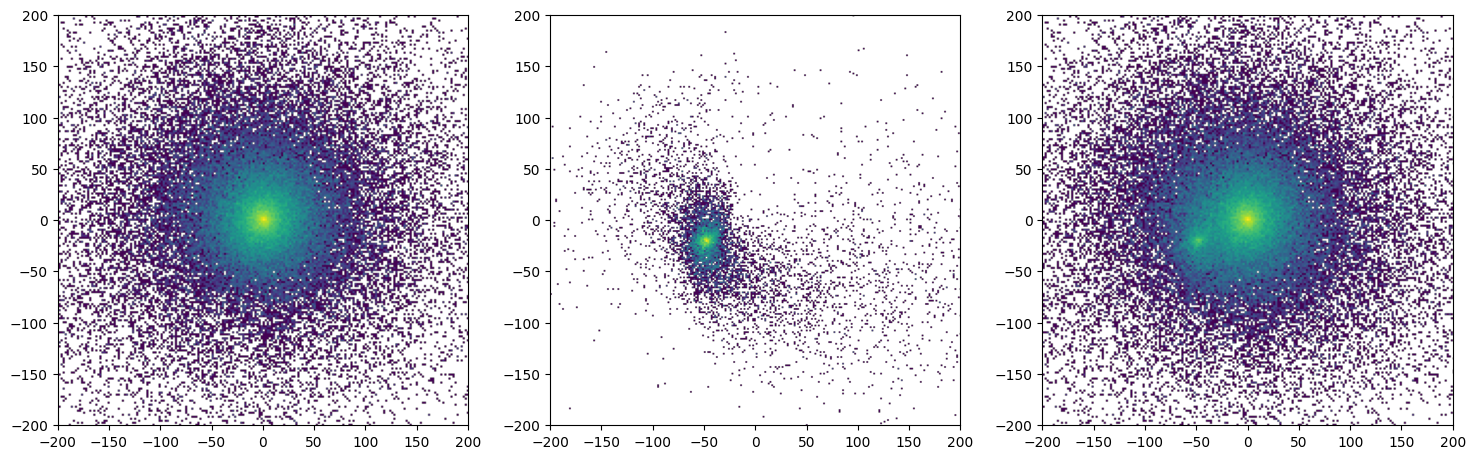

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

ax[0].imshow(Hmw.T, norm=LogNorm(), extent=[np.min(xmw), np.max(xmw), np.min(ymw), np.max(ymw)], origin='lower')
ax[0].set_xlim(-200, 200)
ax[0].set_ylim(-200, 200)

ax[1].imshow(Hlmc.T, norm=LogNorm(), extent=[np.min(xlmc), np.max(xlmc), np.min(ylmc), np.max(ylmc)], origin='lower')
ax[1].set_xlim(-200, 200)
ax[1].set_ylim(-200, 200)

ax[2].imshow(Hmwlmc.T, norm=LogNorm(), extent=[np.min(xmwlmc), np.max(xmwlmc), np.min(ymwlmc), np.max(ymwlmc)], origin='lower')
ax[2].set_xlim(-200, 200)
ax[2].set_ylim(-200, 200)



#plt.show()

In [7]:
LMC_pb = createPBhalo(dark_part = GC21_LMC_data)
MW_pb = createPBhalo(dark_part = GC21_LMC_data)

* Building halo with 15000000 dark and 0 star particles


In [16]:
os.chdir("../com/")
from com_methods import CenterHalo

In [17]:
lmc_center = CenterHalo(GC21_lmc_data)

In [18]:
lmc_center.shrinking_sphere()

(array([ 13.411795,  56.20694 , -35.43957 ], dtype=float32),
 array([ -41.231922, -338.4472  ,   17.6046  ], dtype=float32))

In [19]:
lmc_center.shrinking_sphere_numba()

(array([ 13.49756388,  54.77863677, -35.23084422]),
 array([ -42.48546809, -338.81225558,   22.63471158]))

In [31]:
pynbody.analysis.center(LMC_pb, mode='com')

<Transformation translate, offset_velocity>

In [32]:
pynbody.analysis.center(LMC_pb, mode='ssc', r=100,  return_cen=True,
                        min_particles=100, particles_for_velocity=10000)


SimArray([ -7.51705348, -60.47815811,   4.59448762], 'kpc')

In [33]:
pynbody.analysis.center(LMC_pb, mode='ssc', return_cen=True)

SimArray([ -7.51829578, -60.47227127,   4.59890356], 'kpc')

In [34]:
pynbody.analysis.center(LMC_pb, mode='ssc', return_cen=True,
                        shrink_factor=0.975, min_particles=1000)

SimArray([ -7.52347254, -60.45736196,   4.58843764], 'kpc')

In [9]:
ss = pynbody.analysis.center(LMC_pb, mode='hyb', return_cen=True)

In [11]:
np.array(ss)

array([  8.62202278,  41.90541933, -10.73610564])

In [29]:
from astropy.constants import G
from astropy import units as u

In [33]:
G.to(u.kpc*u.km**2/u.Msun/u.s**2)

<Quantity 4.30091727e-06 km2 kpc / (solMass s2)>

In [2]:
50* 400 /60.

333.3333333333333